# 机器学习步骤
* 模型训练
* 模型评估
* 模型保存
* 模型应用

In [2]:
import numpy as np
data=np.loadtxt('mnist_test.csv',delimiter=',')
x=data[:,1:]
y=data[:,0:1].astype(int)

# 对label进行独热编码后的数据 one hot encoding
Y=np.eye(10)[y.T[0]]

## 把数据集拆分成训练集和测试集，80%的数据训练，20%的数据测试
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=23)

## 导入TensorFlow的包
from tensorflow.keras.models import Sequential#顺序模型：从左边输入，从右边输出
from tensorflow.keras.layers import Dense,Activation#Dense：线性输入输出；Activation：激活函数
import numpy as np

## 创建模型
model=Sequential()#创建一个顺序模型
## 指定模型的输入和输出
model.add(Dense(30,input_shape=(784,)))#输入784个数据，输出30个数据
## 制定模型的激活函数
model.add(Activation('relu'))#多分类要使用softmax的激活函数
model.add(Dense(10))#输入30个数据，输出10个数据
model.add(Activation('softmax'))#多分类最后一行要使用softmax的激活函数

## 打印模型的概要信息
model.summary()

## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
result=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))#在训练过程中就查看验证集数据的准确度


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 18.7035 - accuracy: 0.4557 - val_loss: 2.5352 - val_accuracy: 0.4380
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 1.9899 - accuracy: 0.4389 - val_los

63/63 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9329 - val_loss: 1.2241 - val_accuracy: 0.8715
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9266 - val_loss: 1.3188 - val_accuracy: 0.8655
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9301 - val_loss: 1.1861 - val_accuracy: 0.8650
Epoch 55/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9301 - val_loss: 1.2505 - val_accuracy: 0.8580
Epoch 56/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9335 - val_loss: 1.1900 - val_accuracy: 0.8555
Epoch 57/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9229 - val_loss: 1.3776 - val_accuracy: 0.8655
Epoch 58/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2125 - accuracy: 0.9323 - val_loss: 1.1782 - val_accuracy: 0.8650
Epoch 59/100
63/63 

## 模型的保存

In [3]:
model.save('mnist.h5')

## 加载模型

<IPython.core.display.Javascript object>


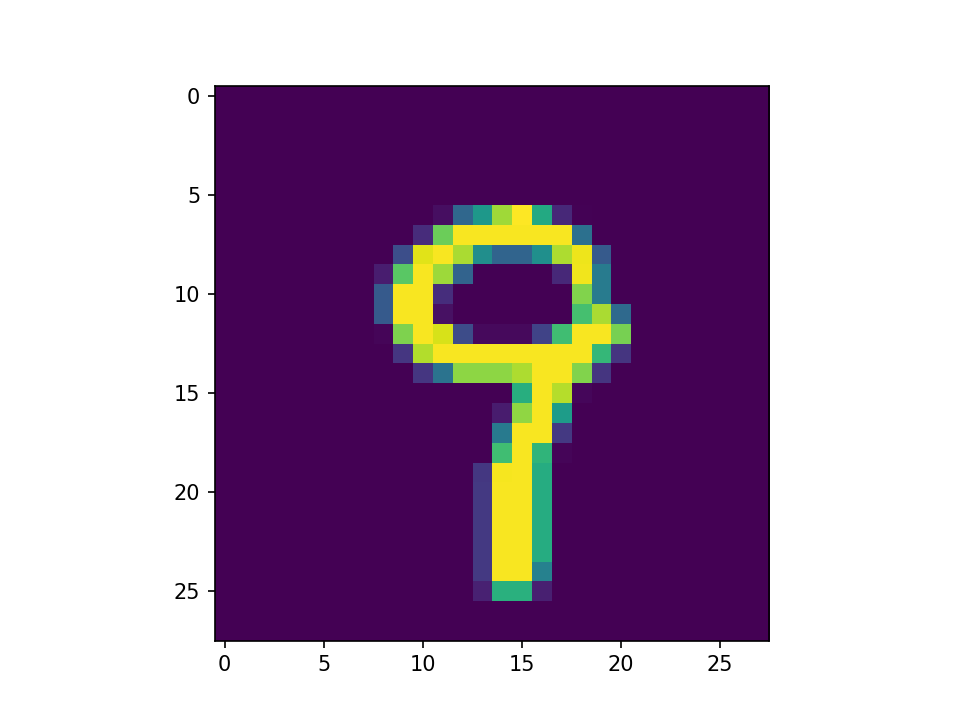

识别的数字为：9


In [14]:
from tensorflow.keras.models import load_model
classifier=load_model('mnist.h5')#加载模型文件
# 创建1——10000的随机数
import matplotlib.pyplot as plt
%matplotlib notebook
index=np.random.randint(0,len(x))
plt.imshow(x[index].reshape(28,28))
np.set_printoptions(suppress=True)
pred=classifier.predict(x[index].reshape(1,784))
number=np.argmax(pred)
print("识别的数字为：{}".format(number))

<IPython.core.display.Javascript object>


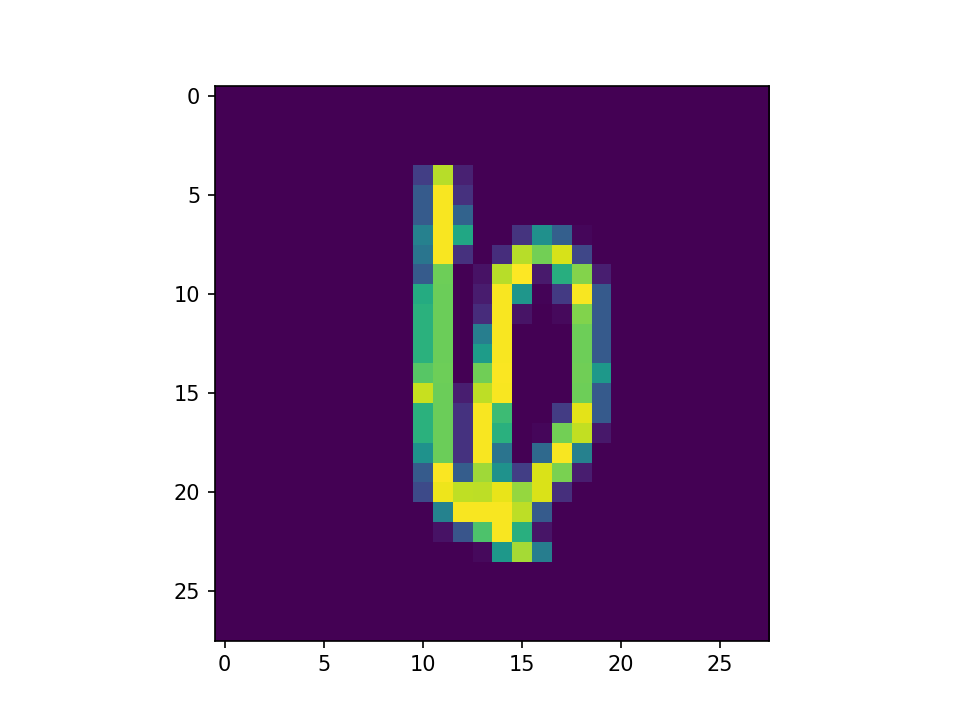

识别的数字为：3


In [22]:
from tensorflow.keras.models import load_model
classifier=load_model('mnist.h5')#加载模型文件_most_flux
# 创建1——10000的随机数
import matplotlib.pyplot as plt
%matplotlib notebook
index=np.random.randint(0,len(x))
plt.imshow(x[index].reshape(28,28))
np.set_printoptions(suppress=True)
pred=classifier.predict(x[index].reshape(1,784))
number=np.argmax(pred)
print("识别的数字为：{}".format(number))

# 模型评价

In [23]:
#导包，导入sklearn科学计算库的混淆矩阵和报表包
from sklearn.metrics import classification_report,confusion_matrix
#预测值
#y_pred=classifier.predict_classes
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
real=np.argmax(y_test,axis=1)
print(classification_report(real,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       207
           1       0.97      0.97      0.97       237
           2       0.91      0.89      0.90       195
           3       0.92      0.91      0.92       215
           4       0.88      0.84      0.86       188
           5       0.90      0.86      0.88       176
           6       0.92      0.88      0.90       192
           7       0.89      0.91      0.90       190
           8       0.82      0.85      0.83       200
           9       0.72      0.81      0.76       200

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [24]:
confusion_matrix(real,y_pred)

array([[197,   0,   2,   0,   1,   0,   1,   0,   4,   2],
       [  0, 231,   2,   0,   2,   0,   0,   0,   1,   1],
       [  1,   0, 173,   1,   1,   0,   4,   3,   8,   4],
       [  0,   0,   4, 196,   0,   5,   0,   2,   4,   4],
       [  1,   0,   0,   1, 157,   1,   3,   0,   1,  24],
       [  0,   0,   0,   9,   0, 152,   2,   0,  11,   2],
       [  3,   0,   1,   1,  10,   6, 168,   0,   1,   2],
       [  0,   3,   8,   0,   1,   0,   0, 172,   1,   5],
       [  1,   4,   1,   1,   0,   2,   3,   0, 170,  18],
       [  1,   0,   0,   3,   7,   2,   2,  16,   7, 162]], dtype=int64)

# 把预测错误的数据可视化

In [26]:
error_position=np.nonzero(real-y_pred)[0]

array([  21,   36,   45,   67,   71,   81,   94,  112,  119,  120,  123,
        125,  129,  146,  159,  160,  169,  175,  179,  190,  195,  202,
        226,  230,  234,  247,  268,  290,  297,  312,  315,  347,  349,
        350,  355,  370,  371,  375,  382,  388,  395,  397,  399,  407,
        418,  425,  429,  432,  449,  452,  461,  469,  473,  477,  500,
        501,  537,  552,  553,  556,  575,  584,  589,  598,  631,  639,
        658,  659,  668,  669,  681,  693,  697,  715,  723,  727,  730,
        736,  763,  794,  796,  842,  862,  864,  871,  874,  877,  880,
        893,  905,  908,  923,  925,  928,  932,  957,  959,  967,  974,
       1002, 1015, 1017, 1021, 1025, 1031, 1037, 1039, 1076, 1081, 1086,
       1098, 1100, 1105, 1108, 1109, 1111, 1122, 1128, 1135, 1141, 1142,
       1145, 1155, 1165, 1178, 1185, 1190, 1198, 1202, 1204, 1215, 1221,
       1226, 1228, 1232, 1236, 1250, 1251, 1253, 1254, 1256, 1278, 1280,
       1293, 1297, 1306, 1312, 1325, 1338, 1350, 13

<IPython.core.display.Javascript object>


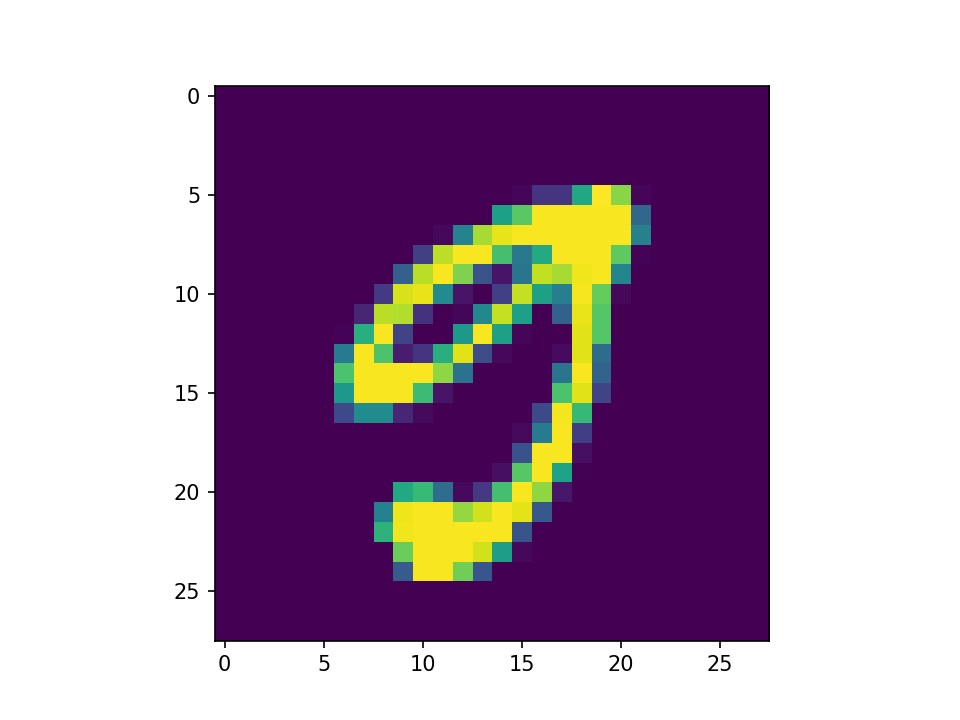

识别的数字为：0,真实数字为：9


In [32]:
error_position=np.nonzero(real-y_pred)[0]
error_index=np.random.randint(0,len(error_position))
%matplotlib notebook
plt.imshow(x_test[error_position[error_index]].reshape(28,28))

pred=classifier.predict(x_test[error_position[error_index]].reshape(1,784))
number=np.argmax(pred)
print("识别的数字为：{},真实数字为：{}".format(number,np.argmax(y_test[error_position[error_index]])))